### **Monte Carlo Simulation in Project Management for Critical Path Analysis**

**Concept:**

In project management, Monte Carlo simulation helps assess the impact of uncertainty in project schedules. By modeling the variability in task durations, you can estimate the probability of meeting deadlines.

**Simulation Steps:**

1. **Define Project Tasks and Dependencies:**

   - Create a network diagram with tasks, durations, and dependencies.
   
2. **Assign Probability Distributions to Task Durations:**

   - Use distributions like triangular, normal, or beta to model uncertainty.
   
3. **Run Simulations:**

   - For each iteration, sample task durations and calculate the project completion time.
   
4. **Analyze Results:**

   - Compile the distribution of completion times to assess risk.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define tasks with optimistic, most likely, and pessimistic durations
tasks = {
    'Task A': {'predecessors': [], 'duration': [2, 4, 6]},  # [optimistic, most likely, pessimistic]
    'Task B': {'predecessors': ['Task A'], 'duration': [3, 5, 7]},
    'Task C': {'predecessors': ['Task A'], 'duration': [1, 2, 3]},
    'Task D': {'predecessors': ['Task B', 'Task C'], 'duration': [2, 3, 4]}
}

In [4]:
def sample_task_duration(triple):
    # Use PERT (Program Evaluation and Review Technique) Beta Distribution
    optimistic, most_likely, pessimistic = triple
    mean = (optimistic + 4 * most_likely + pessimistic) / 6
    std_dev = (pessimistic - optimistic) / 6
    return np.random.normal(mean, std_dev)

In [7]:
def monte_carlo_schedule(tasks, num_simulations):
    project_durations = []
    for _ in range(num_simulations):
        task_durations = {}
        for task, info in tasks.items():
            duration = sample_task_duration(info['duration'])
            predecessors = info['predecessors']
            if predecessors:
                start_time = max(task_durations[p] for p in predecessors)
            else:
                start_time = 0
            finish_time = start_time + duration
            task_durations[task] = finish_time
        project_duration = max(task_durations.values())
        project_durations.append(project_duration)
    return project_durations

In [8]:
# Run simulations
num_simulations = 10_000
project_durations = monte_carlo_schedule(tasks, num_simulations)

In [10]:
# Analyze results
mean_duration = np.mean(project_durations)
percentile_90 = np.percentile(project_durations, 90)

print(f"Expected Project Duration: {mean_duration:.2f} days")
print(f"90th Percentile Duration: {percentile_90:.2f} days")

Expected Project Duration: 12.01 days
90th Percentile Duration: 13.28 days


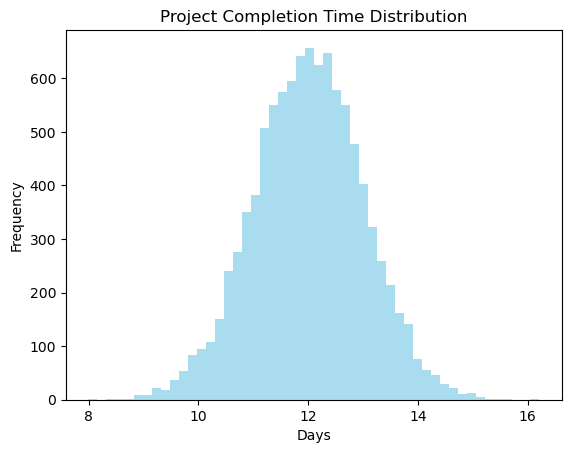

In [11]:
# Plot histogram
plt.hist(project_durations, bins=50, alpha=0.7, color='skyblue')
plt.title("Project Completion Time Distribution")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

**Explanation:**

- **Task Durations:** Sampled using a simplified PERT distribution.
- **Dependencies:** Ensures that tasks start after their predecessors are complete.
- **Project Duration:** The maximum finish time among all tasks.

**Benefits:**

- Helps identify the probability of meeting project deadlines.
- Allows for better risk management and contingency planning.